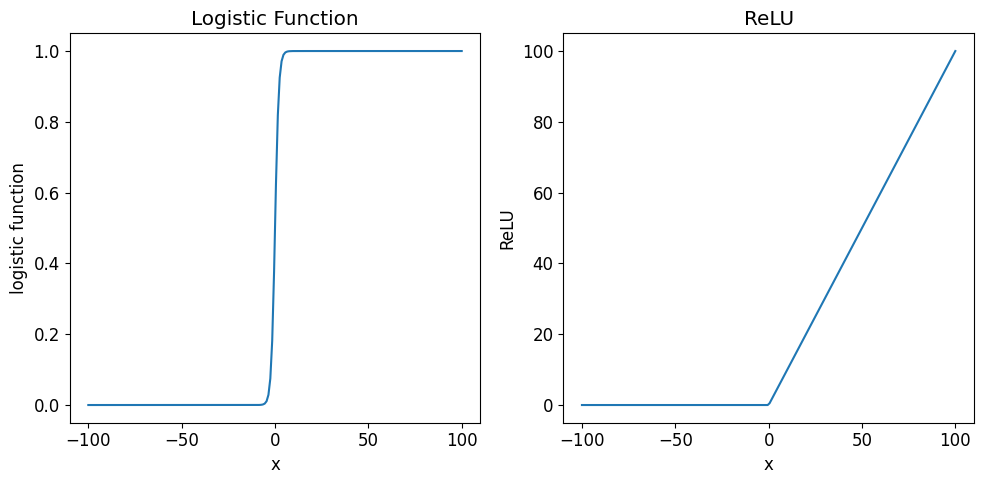

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjust the figure size and font size
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 12})

# Generate the x values
x = np.linspace(-100, 100, 200)

# Define the logistic function
def logistic_fn(x):
    return 1 / (1 + np.exp(-x))

# Calculate the logistic function values
l = logistic_fn(x)

# Plot the logistic function
plt.subplot(1, 2, 1)
plt.plot(x, l)
plt.title('Logistic Function')
plt.xlabel("x")
plt.ylabel("logistic function")

# Define and plot the ReLU function
ReLU = np.maximum(x, 0)

plt.subplot(1, 2, 2)
plt.plot(x, ReLU)
plt.title("ReLU")
plt.xlabel("x")
plt.ylabel("ReLU")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

(55,) (55,)


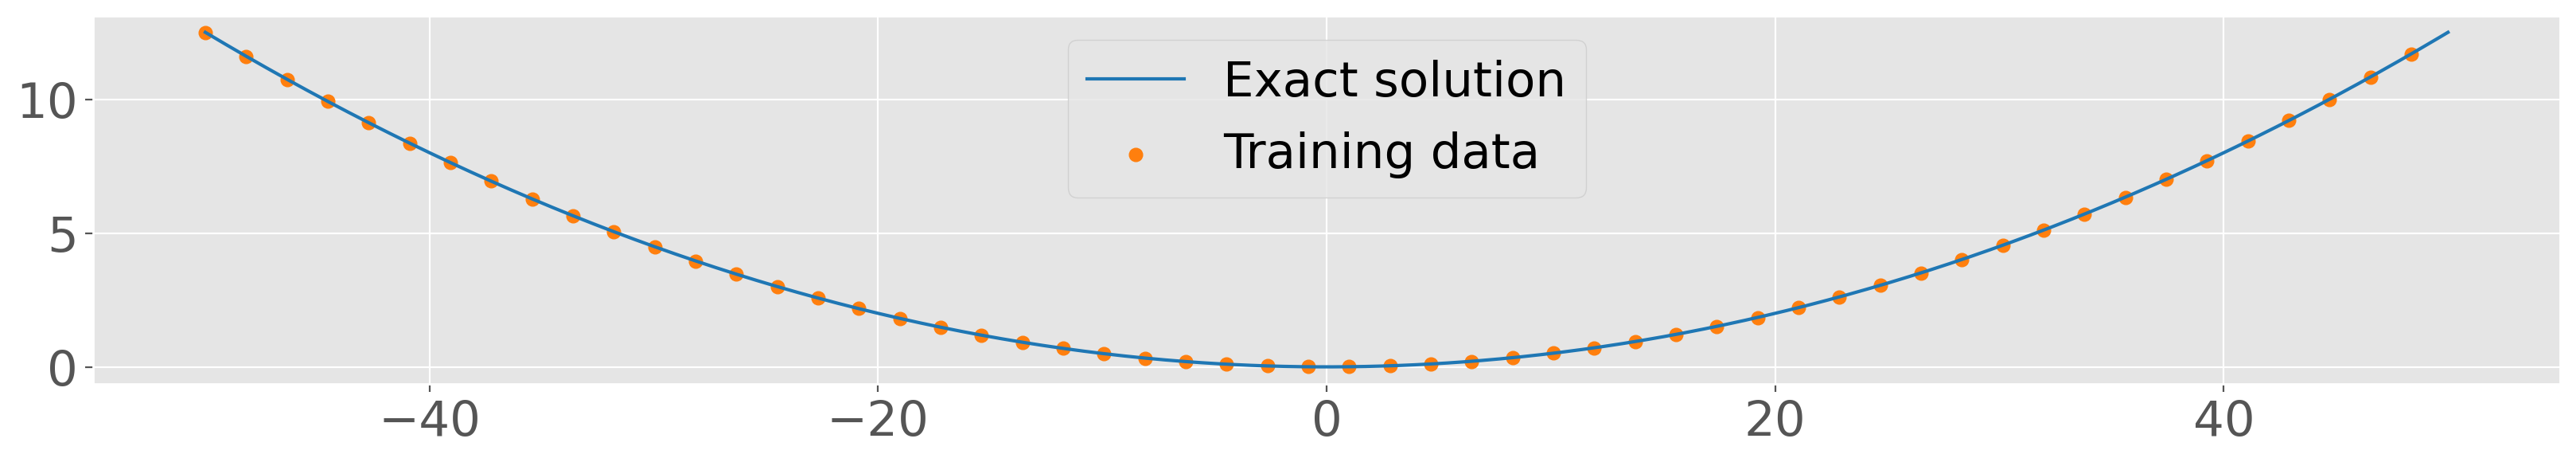

In [ ]:
#Collect and prepare the Data

import tensorflow as tf # is from google or facebooks (meta) pytorch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi']=200 # highres display
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

import imageio
my_images = []

# Data Generation------

# Generating random data and add noise
# There will be ndata data points ranging from 0 to 50
ndata = 550
x = np.linspace(-50, 50, ndata)

# Adding noise to the random linear data
y=x**2/200 # + np.random.uniform(-4, 4, 550)#y**3/5000

n = len(x) # Number of data points

# slice out a small number of points from the LHS of the domain
x_data = x[0:550:10]
#print(x_data)
#print(len(x_data))
y_data = y[0:550:10]
print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, x**2/200, color="tab:blue", label="Exact solution")
# plt.scatter(x, y, color="tab:blue", label="Collected data")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                64        
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


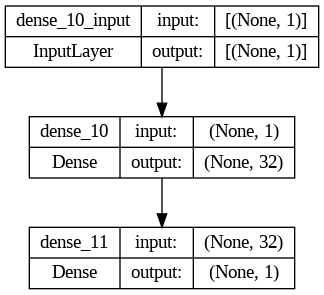

In [ ]:
# MODEL1 (i define the model)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape=[1])) # 1 input, 32 neurons
model1.add(tf.keras.layers.Dense(1)) # 1 output

#(ii compile the model)

from tensorflow.keras.utils import plot_model

model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model1.summary()
plot_model(model1, 'model1.png', show_shapes=True)



In [ ]:
# (iii)Fit the model

class PerformanceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        #Custom performance calculations or actions at the end of each epoch
        #Replace this with your specific implementation
        print("Performance callback executed at the end of epoch", epoch)

# Create an instance of the custom performance callback
performance = PerformanceCallback()

# Rest of your code
history = model1.fit(x_data, y_data, epochs=500, callbacks=[performance])

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 51.9415
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 34.4938
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 40.3294
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 39.7624
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 26.8475
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 27.2603
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 30.6855
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 27.5065
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 23.1170
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 23.1707
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 24.0638
Epoch 12/500
2/2 [==============================] - 0s 6ms/step - loss: 21.6097
Epoch 13/500
2/2 [==============================]

18/18 [==============================] - 0s 2ms/step


[None, None, None, None, None, None]

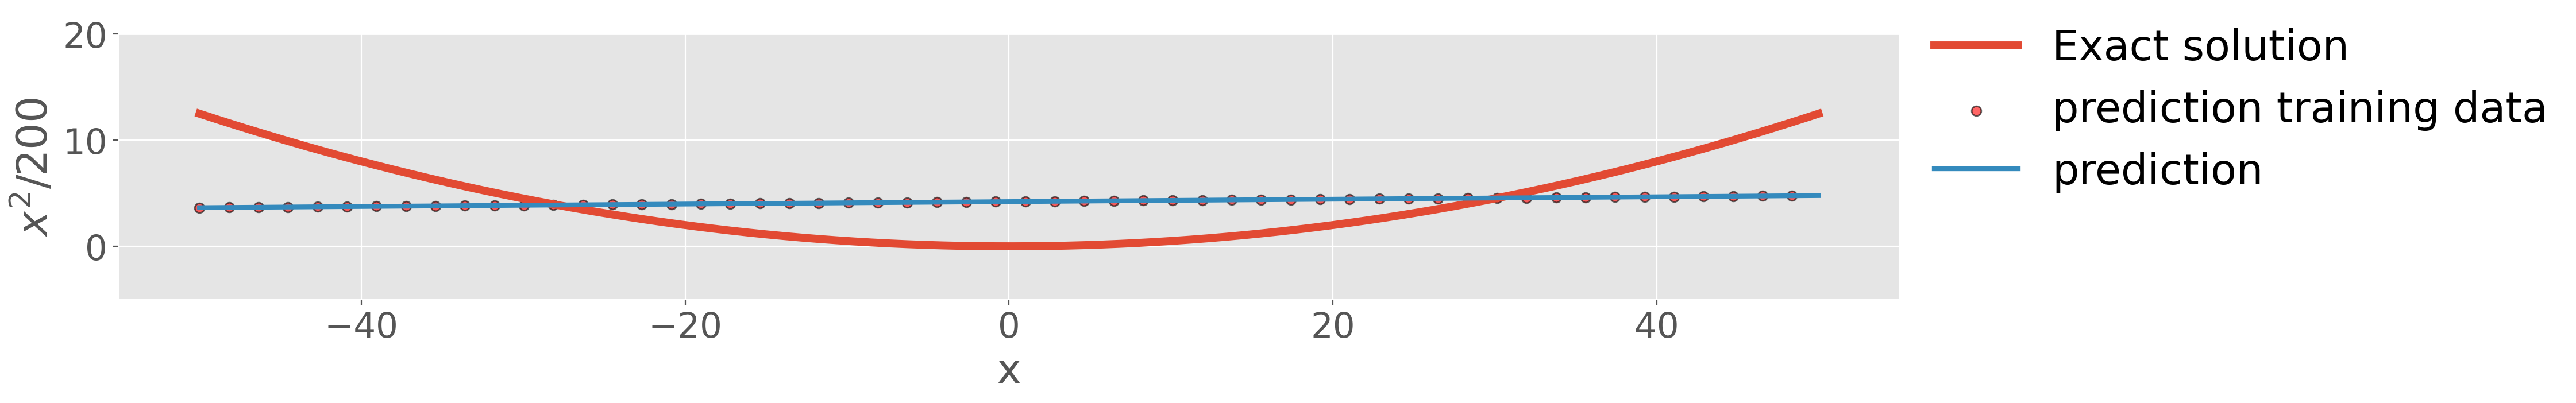

In [ ]:
plt.figure()
# x_test = x[0:550:5]
# y_test = y[0:550:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model1.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model1.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

In [ ]:
#Model 2
import tensorflow as tf
#defining the model

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 132)               264       
                                                                 
 dense_21 (Dense)            (None, 132)               17556     
                                                                 
 dense_22 (Dense)            (None, 132)               17556     
                                                                 
 dense_23 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
import imageio

import matplotlib.pyplot as plt
#ndata = 550
#x = np.linspace(-50, 50, ndata)
#y = x**2 / 200

x_data = x[0:550:10]
y_data = y[0:550:10]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(132, input_shape=[1]))
model.add(tf.keras.layers.Dense(132, activation='relu'))
model.add(tf.keras.layers.Dense(132, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model.summary()

class PerformancePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_data, y_data, x_range, index, title):
        self.x_data = x_data
        self.y_data = y_data
        self.x_range = x_range
        self.index = index
        self.title = title
        self.images = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.x_range)
        plt.figure()
        plt.scatter(self.x_data, self.y_data, color='tab:orange', label='Training data')
        plt.plot(self.x_range, y_pred, color='tab:blue', label='Predicted')
        plt.title(self.title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.savefig(f'./image_{epoch}.png')
        plt.close()

        image_path = f'./image_{epoch}.png'
        self.images.append(imageio.imread(image_path))

    def on_train_end(self, logs=None):
        imageio.mimsave('./para3.gif', self.images, fps=10)

performance = PerformancePlotCallback(x_data, y_data, x, 0, 'Regression')
history = model.fit(x_data, y_data, epochs=500, batch_size=32, callbacks=[performance])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 132)               264       
                                                                 
 dense_25 (Dense)            (None, 132)               17556     
                                                                 
 dense_26 (Dense)            (None, 132)               17556     
                                                                 
 dense_27 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 3s 989ms/step - loss: 241.3502
Epoch 2/500
 1/18 [>.............................] - ETA: 0s

<ipython-input-14-ea0b87bd690f>:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  self.images.append(imageio.imread(image_path))


2/2 [==============================] - 1s 597ms/step - loss: 19.1055
Epoch 3/500
2/2 [==============================] - 1s 562ms/step - loss: 13.5615
Epoch 4/500
2/2 [==============================] - 1s 576ms/step - loss: 12.6691
Epoch 5/500
2/2 [==============================] - 1s 547ms/step - loss: 7.2582
Epoch 6/500
2/2 [==============================] - 1s 561ms/step - loss: 8.6294
Epoch 7/500
2/2 [==============================] - 1s 522ms/step - loss: 7.9376
Epoch 8/500
2/2 [==============================] - 1s 581ms/step - loss: 6.3407
Epoch 9/500
2/2 [==============================] - 1s 591ms/step - loss: 8.3668
Epoch 10/500
2/2 [==============================] - 1s 598ms/step - loss: 2.3557
Epoch 11/500
2/2 [==============================] - 1s 587ms/step - loss: 4.1130
Epoch 12/500
2/2 [==============================] - 1s 809ms/step - loss: 2.7968
Epoch 13/500
2/2 [==============================] - 1s 815ms/step - loss: 2.7469
Epoch 14/500
2/2 [===========================

18/18 [==============================] - 0s 1ms/step


[None, None, None, None, None, None]

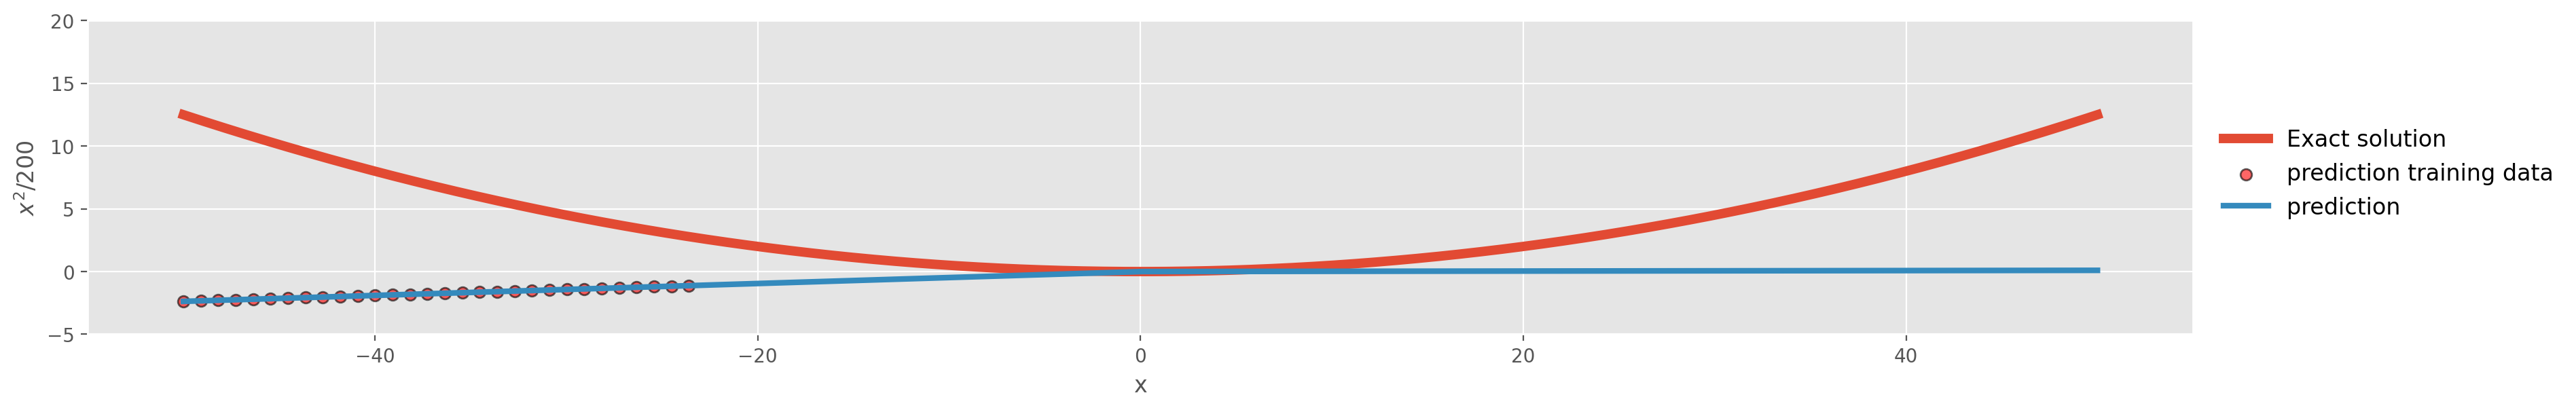

In [ ]:
plt.figure()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
#matplotlib.rcParams['figure.dpi']=200 # highres display
#plt.rcParams["figure.figsize"] = (20,3)
#plt.rcParams.update({'font.size': 22})

# x_data = x[0:550:10]
# y_data = y[0:550:10]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model2.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

In [ ]:
import tensorflow as tf
import numpy as np
import imageio
import matplotlib.pyplot as plt


model2d = tf.keras.Sequential()
model2d.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2d.add(tf.keras.layers.Dense(132, activation='relu'))
model2d.add(tf.keras.layers.Dense(132, activation='relu'))
model2d.add(tf.keras.layers.Dense(1))
model2d.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2d.summary()

class PerformancePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_data, y_data, x_range, index, title):
        self.x_data = x_data
        self.y_data = y_data
        self.x_range = x_range
        self.index = index
        self.title = title
        self.images = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.x_range)
        plt.figure()
        plt.scatter(self.x_data, self.y_data, color='tab:orange', label='Training data')
        plt.plot(self.x_range, y_pred, color='tab:blue', label='Predicted')
        plt.title(self.title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.savefig(f'./image_{epoch}.png')
        plt.close()

        image_path = f'./image_{epoch}.png'
        self.images.append(imageio.imread(image_path))

    def on_train_end(self, logs=None):
        imageio.mimsave('./para3.gif', self.images, fps=10)

performance = PerformancePlotCallback(x_data, y_data, x, 0, 'Regression')
history = model2d.fit(x_data, y_data, epochs=500, batch_size=32, callbacks=[performance])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 132)               264       
                                                                 
 dense_37 (Dense)            (None, 132)               17556     
                                                                 
 dense_38 (Dense)            (None, 132)               17556     
                                                                 
 dense_39 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35,509
Trainable params: 35,509
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 55.7372
Epoch 2/500
18/18 [==============================] - 0s 1ms/step


<ipython-input-22-d9221aa042c1>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  self.images.append(imageio.imread(image_path))


1/1 [==============================] - 1s 551ms/step - loss: 1245.7152
Epoch 3/500
1/1 [==============================] - 1s 538ms/step - loss: 31.3109
Epoch 4/500
1/1 [==============================] - 1s 505ms/step - loss: 72.4704
Epoch 5/500
1/1 [==============================] - 1s 536ms/step - loss: 86.3753
Epoch 6/500
1/1 [==============================] - 1s 557ms/step - loss: 47.2793
Epoch 7/500
1/1 [==============================] - 1s 546ms/step - loss: 9.5987
Epoch 8/500
1/1 [==============================] - 1s 571ms/step - loss: 6.0462
Epoch 9/500
1/1 [==============================] - 1s 590ms/step - loss: 25.0740
Epoch 10/500
1/1 [==============================] - 1s 581ms/step - loss: 18.9908
Epoch 11/500
1/1 [==============================] - 1s 560ms/step - loss: 5.9310
Epoch 12/500
1/1 [==============================] - 1s 583ms/step - loss: 2.0392
Epoch 13/500
1/1 [==============================] - 1s 534ms/step - loss: 5.4863
Epoch 14/500
1/1 [=====================

18/18 [==============================] - 0s 1ms/step


[None, None, None, None, None, None]

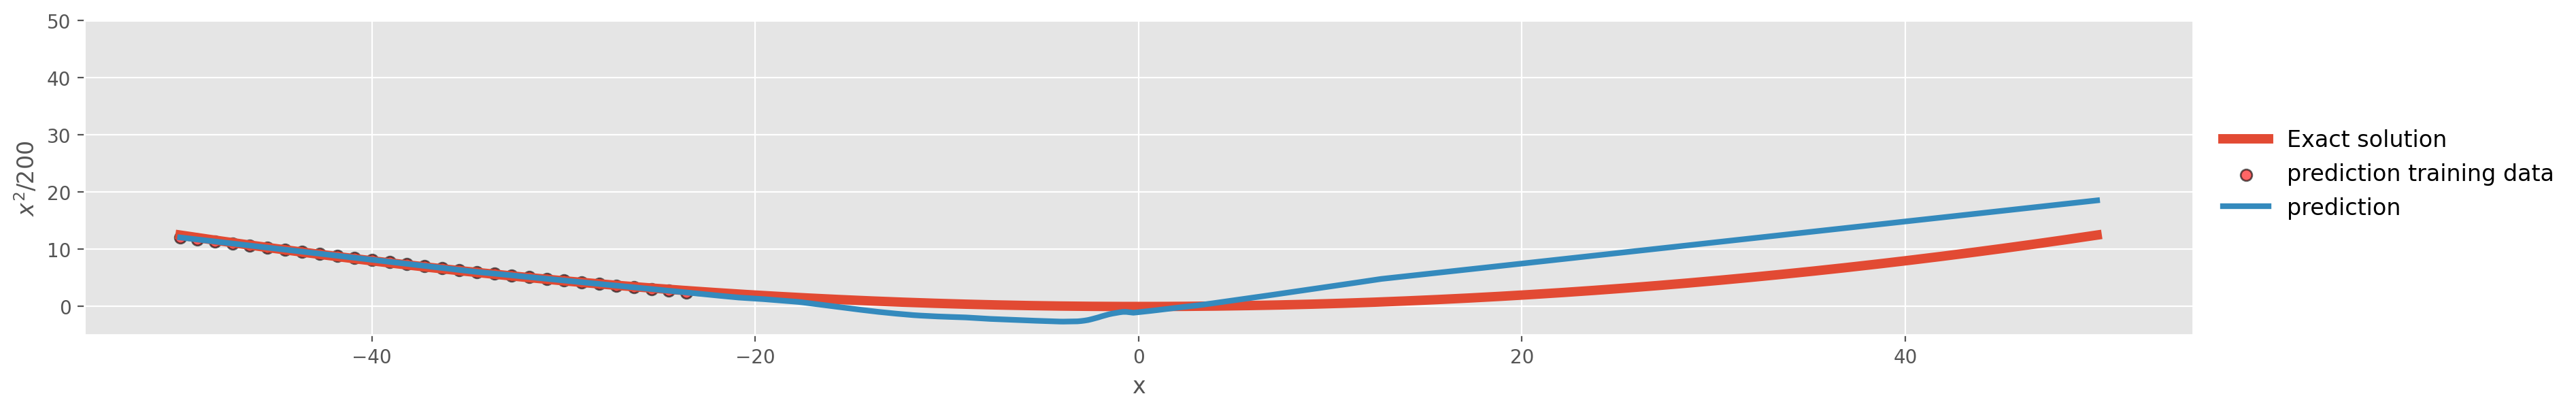

In [ ]:
plt.figure()
x_data = x[0:150:5]
y_data = y[0:150:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black',label="prediction training data")

plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

18/18 [==============================] - 0s 2ms/step


Text(0, 0.5, '$x^2/200$')

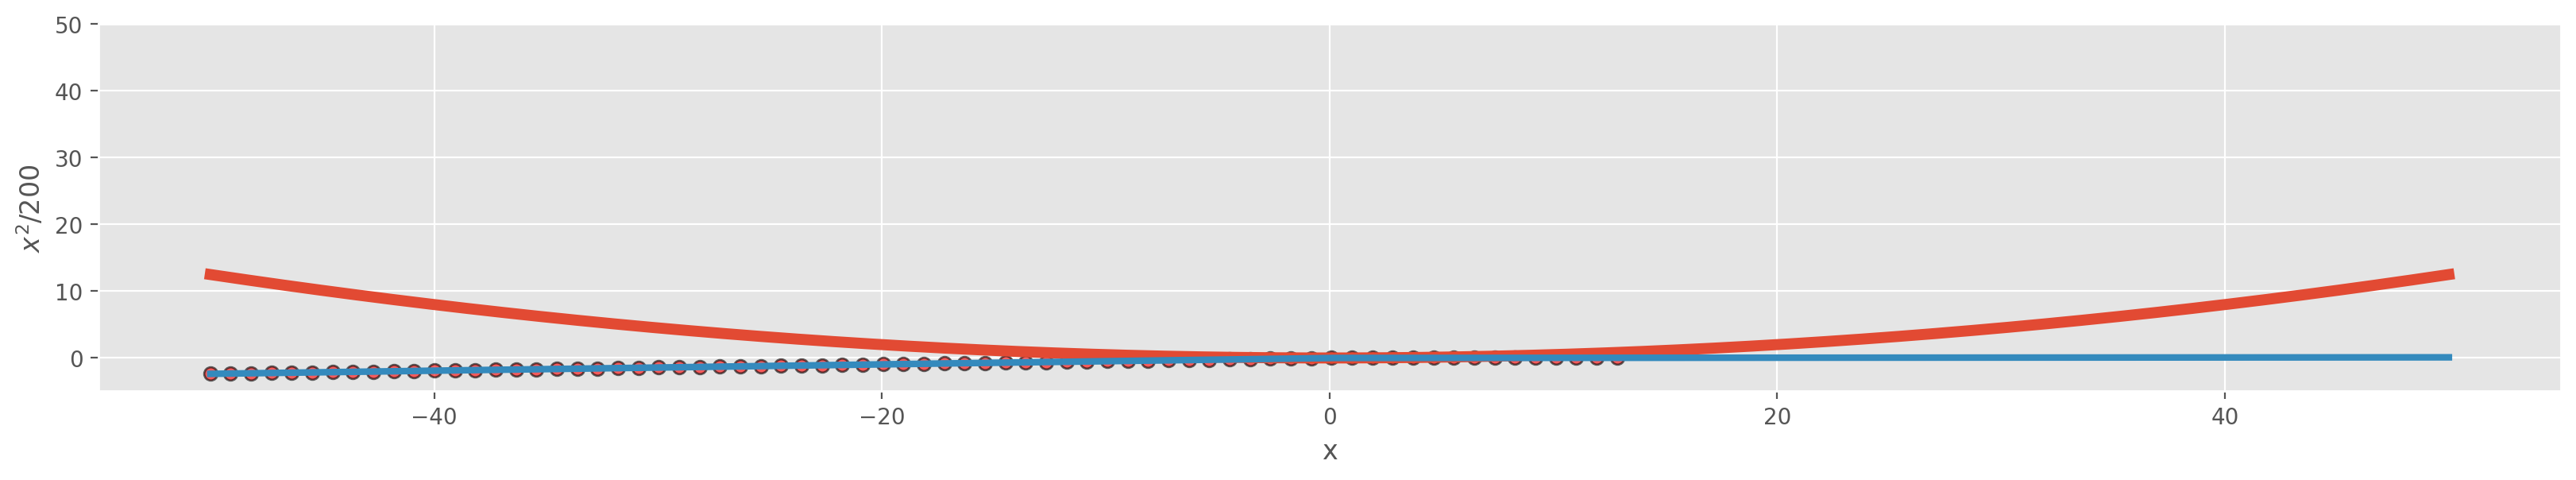

In [ ]:
plt.figure()
x_data = x[0:350:5]
y_data = y[0:350:5]
plt.plot(x,x**2/200,lw=5)
plt.scatter(x_data, model2.predict(x_data), alpha=0.6,
                color='#FF0000', lw=1, ec='black')

plt.plot(x, model2.predict(x), lw=3)
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

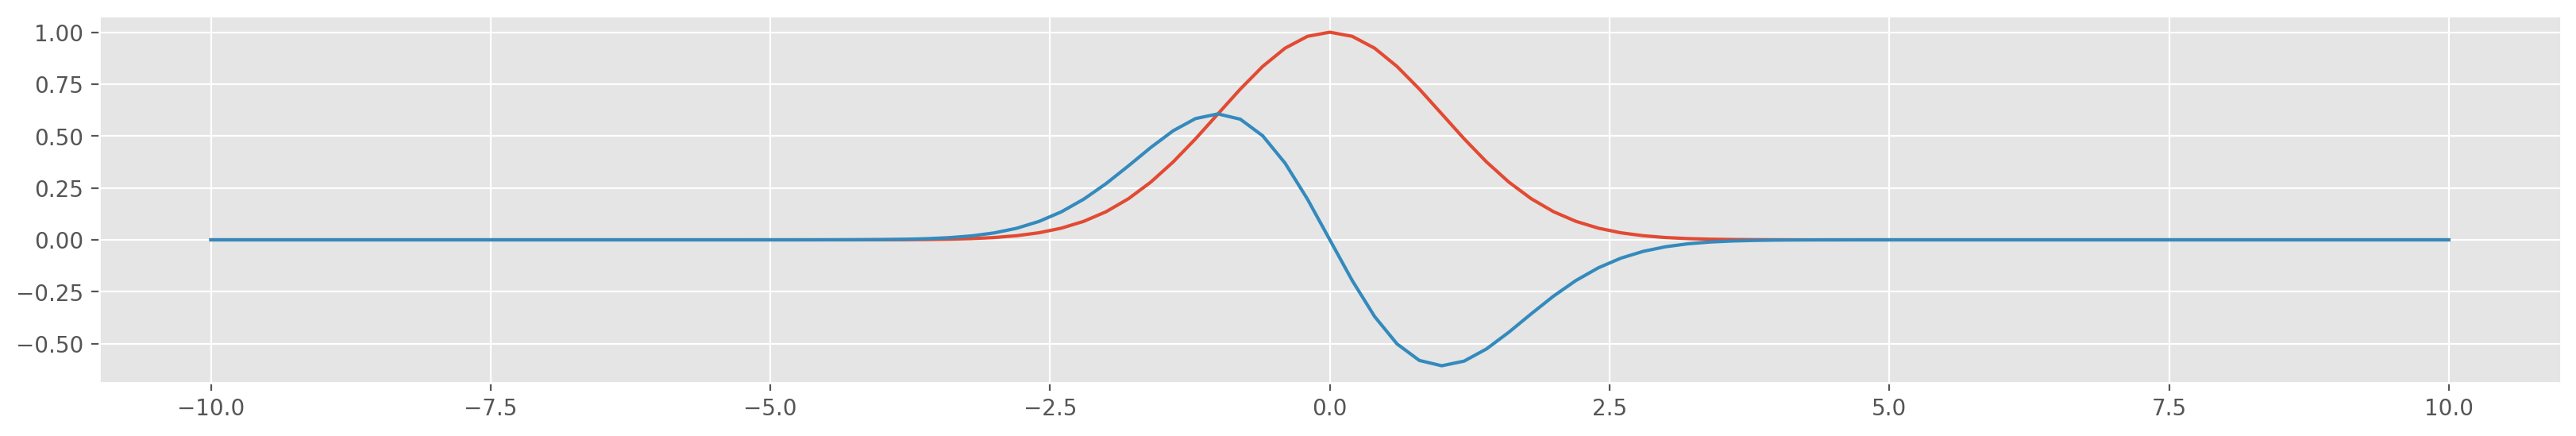

In [ ]:
#Model 3

import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
#x = np.linspace(-10,10,100)
x= tf.linspace(-10.0,10.0,101)

#y = np.sin(x)
#ytf = tf.convert_to_tensor(y, np.float32)
with tf.GradientTape() as tape:
    tape.watch(x)
    #y = tf.math.sin(x)
    y = tf.math.exp(-x**2/2)
dydxAD = tape.gradient(y,x)
#dydxAD
plt.plot(x,y)
plt.plot(x,dydxAD)

In [ ]:
dydxAD[60]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.27067056>

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

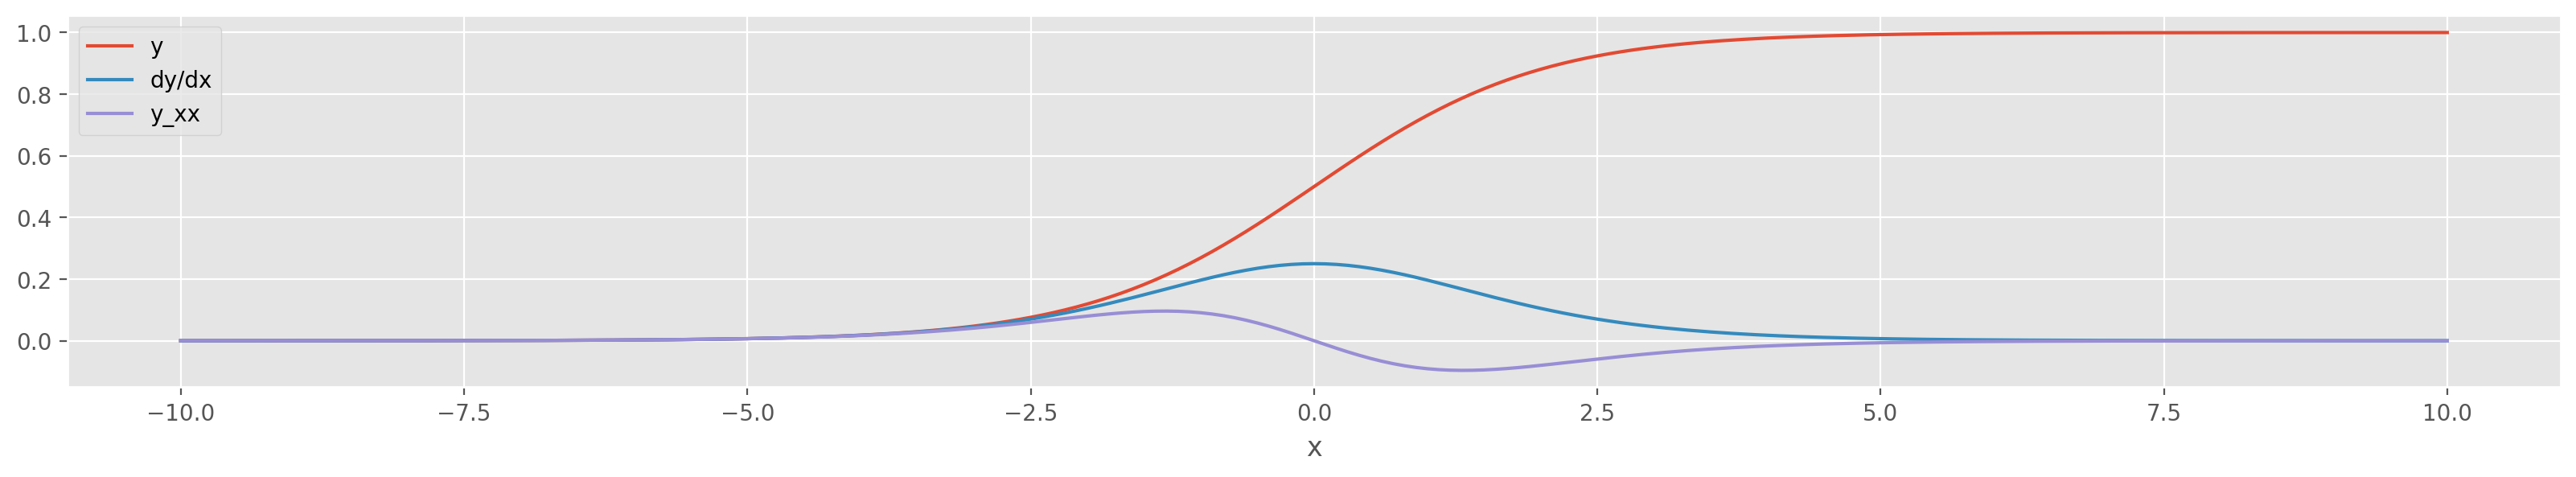

In [ ]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    with tf.GradientTape() as tape1:
        tape1.watch(x)
    #y = tf.math.sin(x)
        y =  tf.nn.sigmoid(x)
        y_x = tape1.gradient(y,x)
    #y = tf.math.sin(x)

yxx = tape.gradient(y_x,x)

plt.plot(x, y, label='y')
plt.plot(x, y_x, label='dy/dx')
plt.plot(x, yxx, label='y_xx')
plt.legend()
_ = plt.xlabel('x')

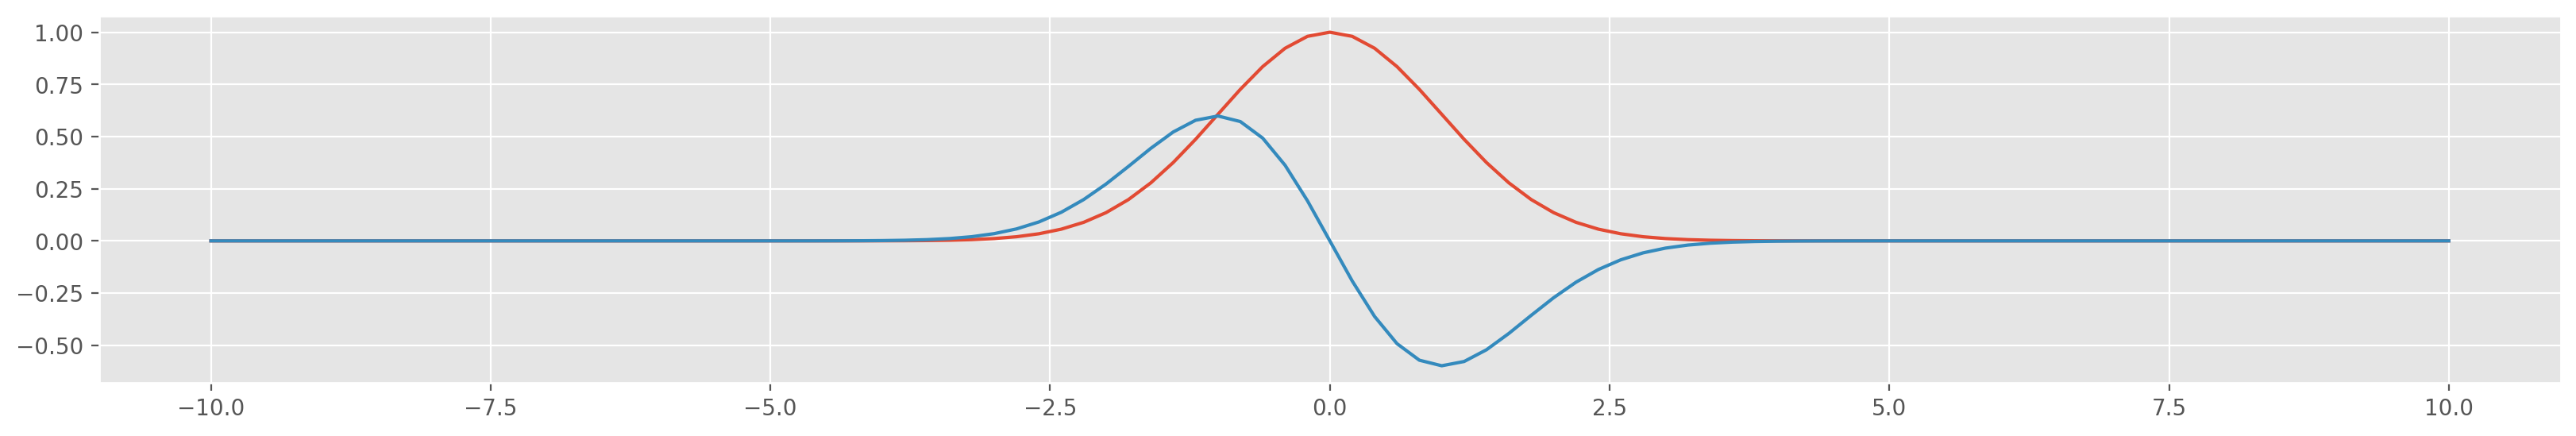

In [ ]:
# numpy gradient
x = np.linspace(-10,10,101)
y = np.exp(-x**2/2)
y_x = np.gradient(y,x)
plt.plot(x,y)
plt.plot(x,y_x)

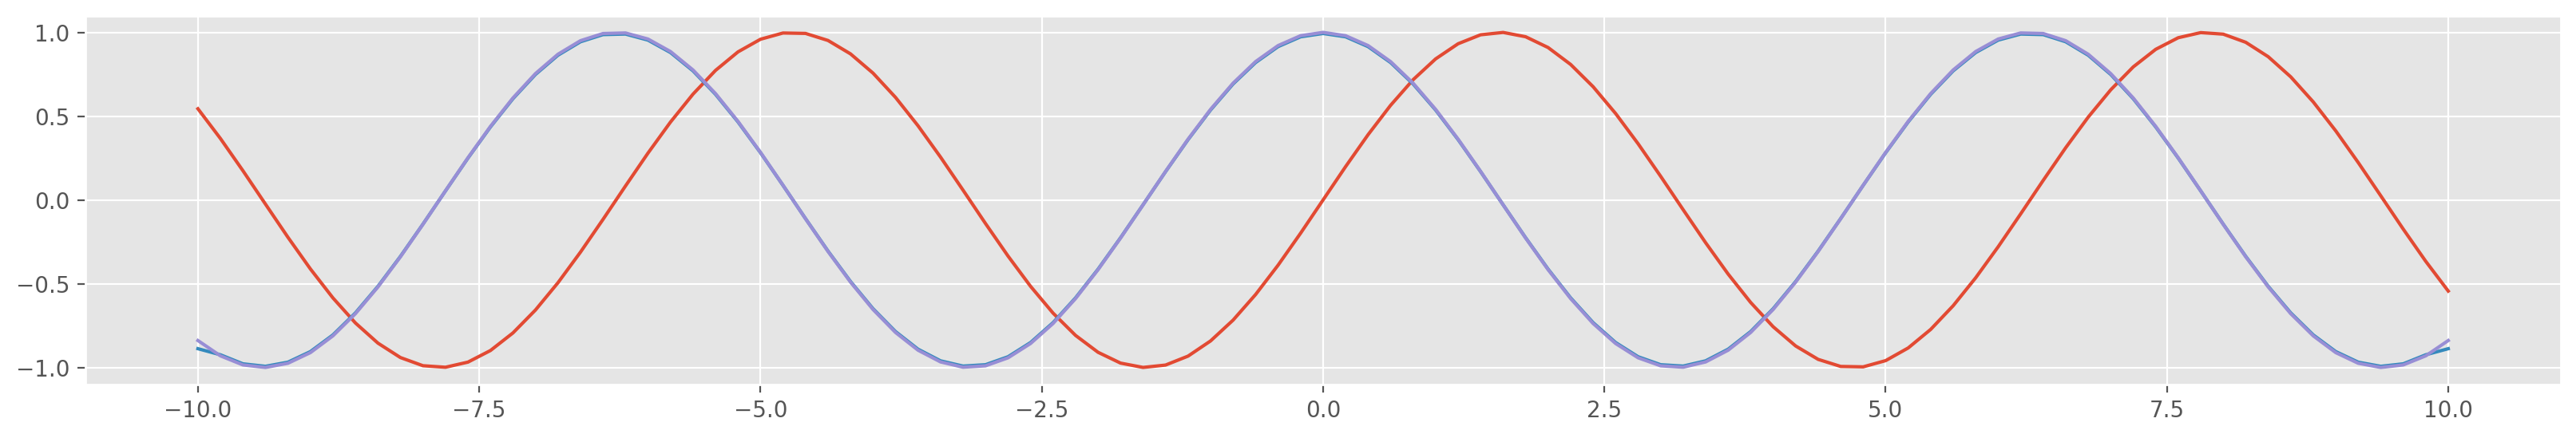

In [ ]:
#x = np.linspace(-10,10,100)
xt= tf.linspace(-10.0,10.0,101)

#y = np.sin(x)
#ytf = tf.convert_to_tensor(y, np.float32)
with tf.GradientTape() as tape:
    tape.watch(xt)
    yt = tf.math.sin(xt)

dydxAD = tape.gradient(yt,xt)
#dydxAD

# numpy gradient
x = np.linspace(-10,10,101)
y = np.sin(x)
y_x = np.gradient(y,x)
plt.plot(x,y)
plt.plot(x,y_x)
plt.plot(xt,dydxAD)